<a href="https://colab.research.google.com/github/qjjslomibao/Final-require-for-emetech/blob/main/final_requirement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/validation',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 9683 images belonging to 2 classes.
Found 592 images belonging to 2 classes.


In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.metrics import BinaryAccuracy


train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='elu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='elu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[BinaryAccuracy()])

save_dir = '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET'

os.makedirs(save_dir, exist_ok=True)

filepath = os.path.join(save_dir, 'best_model.h5')

checkpoint = ModelCheckpoint(filepath,
                              monitor='val_binary_accuracy',
                              save_best_only=True,
                              mode='max',
                              verbose=1)

model.fit(train_generator, validation_data=validation_generator, epochs= 10, callbacks=[checkpoint])

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/validation',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

img_path = '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/validation/happy/10023.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
print(f"Predicted Probability: {prediction[0]}")
print(f"Predicted Class: {round(prediction[0][0])}")


Found 9683 images belonging to 2 classes.
Found 2419 images belonging to 2 classes.
Epoch 1/10
303/303 [==============================] - ETA: 0s - loss: 1.2719 - binary_accuracy: 0.6593
Epoch 1: val_binary_accuracy improved from -inf to 0.61637, saving model to /content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/best_model.h5
303/303 [==============================] - 29s 83ms/step - loss: 1.2719 - binary_accuracy: 0.6593 - val_loss: 0.8942 - val_binary_accuracy: 0.6164


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
303/303 [==============================] - ETA: 0s - loss: 0.5713 - binary_accuracy: 0.7457
Epoch 2: val_binary_accuracy improved from 0.61637 to 0.71848, saving model to /content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/best_model.h5
303/303 [==============================] - 24s 78ms/step - loss: 0.5713 - binary_accuracy: 0.7457 - val_loss: 0.5706 - val_binary_accuracy: 0.7185
Epoch 3/10
303/303 [==============================] - ETA: 0s - loss: 0.4361 - binary_accuracy: 0.8008
Epoch 3: val_binary_accuracy improved from 0.71848 to 0.75072, saving model to /content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/best_model.h5
303/303 [==============================] - 22s 74ms/step - loss: 0.4361 - binary_accuracy: 0.8008 - val_loss: 0.5445 - val_binary_accuracy: 0.7507
Epoch 4/10
303/303 [==============================] - ETA: 0s - loss: 0.3653 - binary_accuracy: 0.8368
Epoch 4: val_binary_accuracy improved from 0.75072 to 0.77305, saving model to /content/drive/M

In [17]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
303/303 [==============================] - 20s 61ms/step - loss: 1.2925 - binary_accuracy: 0.6570 - val_loss: 0.6834 - val_binary_accuracy: 0.6014
Epoch 2/10
303/303 [==============================] - 136s 449ms/step - loss: 0.5461 - binary_accuracy: 0.7545 - val_loss: 0.5505 - val_binary_accuracy: 0.7297
Epoch 3/10
303/303 [==============================] - 18s 61ms/step - loss: 0.4286 - binary_accuracy: 0.8007 - val_loss: 0.6050 - val_binary_accuracy: 0.7027
Epoch 4/10
303/303 [==============================] - 19s 62ms/step - loss: 0.3546 - binary_accuracy: 0.8423 - val_loss: 0.4438 - val_binary_accuracy: 0.7838
Epoch 5/10
303/303 [==============================] - 19s 61ms/step - loss: 0.3015 - binary_accuracy: 0.8704 - val_loss: 0.5591 - val_binary_accuracy: 0.7804
Epoch 6/10
303/303 [==============================] - 19s 62ms/step - loss: 0.2518 - binary_accuracy: 0.8949 - val_loss: 0.7034 - val_binary_accuracy: 0.7584
Epoch 7/10
303/303 [==============================

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/validation',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 2964 images belonging to 2 classes.


In [19]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

93/93 [==============================] - 6s 54ms/step - loss: 0.5161 - binary_accuracy: 0.8006
Test Accuracy: 0.8006072640419006


In [20]:
from keras.preprocessing import image
import numpy as np

img_path = '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/validation/happy/10023.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
print(f"Predicted Probability: {prediction[0]}")
print(f"Predicted Class: {round(prediction[0][0])}")


1/1 [==============================] - 0s 80ms/step
Predicted Probability: [0.99999905]
Predicted Class: 1


In [9]:
from PIL import Image

In [11]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.metrics import BinaryAccuracy

1/1 [==============================] - 0s 17ms/step
The predicted class is: happy
The probability is: 3.172364449710585e-05


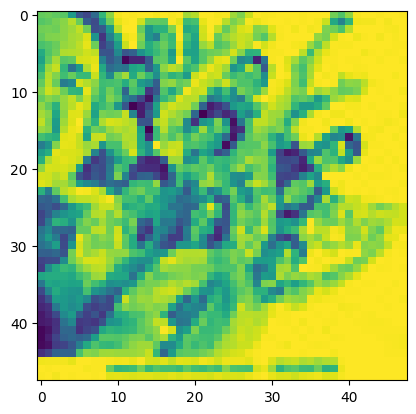

In [12]:
img_path = '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/validation/happy/10023.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
prediction = model.predict(img_array)

class_names = ['happy', 'sad']

predicted_class_index = np.argmax(prediction[0])
predicted_class = class_names[predicted_class_index]
probability = np.max(prediction)

print(f'The predicted class is: {predicted_class}')
print(f'The probability is: {probability}')

img = Image.open(img_path)
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 17ms/step


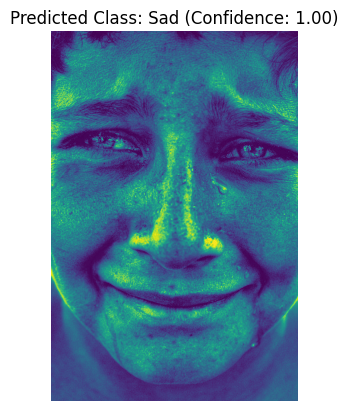

In [13]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img_path = '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/sad/096b101cd34c08b79bb0e6aec2b3afb5.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)

predicted_class = "Happy" if prediction[0] >= 0.5 else "Sad"
confidence = prediction[0] if predicted_class == "Happy" else 1 - prediction[0]
confidence_scalar = float(confidence)

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class} (Confidence: {confidence_scalar:.2f})')
plt.show()


1/1 [==============================] - 0s 17ms/step


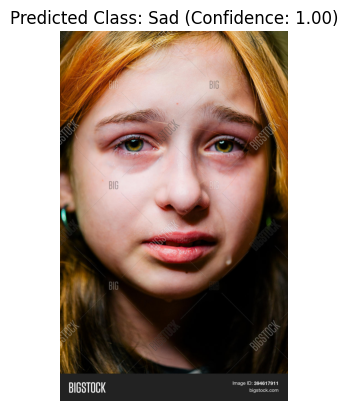

In [14]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img_path = '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/sad/394617911.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)

predicted_class = "Happy" if prediction[0] >= 0.5 else "Sad"
confidence = prediction[0] if predicted_class == "Happy" else 1 - prediction[0]
confidence_scalar = float(confidence)

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class} (Confidence: {confidence_scalar:.2f})')
plt.show()


1/1 [==============================] - 0s 26ms/step


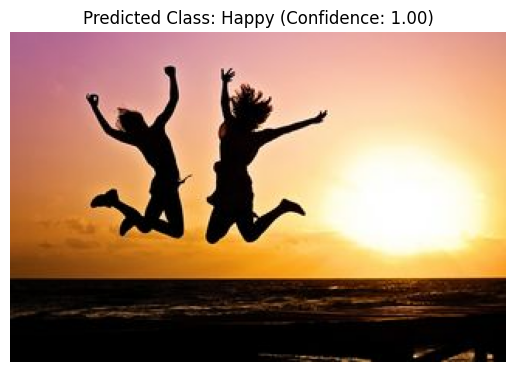

In [15]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img_path = '/content/drive/MyDrive/EMTECH 2 FINAL REQUIREMENT DATASET/happy/_happy_jumping_on_beach-40815.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)

predicted_class = "Happy" if prediction[0] >= 0.5 else "Sad"
confidence = prediction[0] if predicted_class == "Happy" else 1 - prediction[0]
confidence_scalar = float(confidence)

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class} (Confidence: {confidence_scalar:.2f})')
plt.show()
